In [2]:
import pandas as pd

df = pd.read_csv('./tes_companies.csv')
print(df.shape)
df.dropna(subset=['출원인'], inplace=True)
df['출원인'] = df['출원인'].str.lower()

(11395, 69)


In [3]:
# 회사명 통일성 확보
df['companies'] = df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))

# Create separate rows for each combination
df_expanded = df.explode('companies')

In [4]:
def remove_stopwords(word):
    word = word.replace('corporation','')
    word = word.replace('corp','')
    word = word.replace('company','')                                       
    word = word.replace('central','')
    word = word.replace('r&d','')
    word = word.replace('labs','')
    word = word.replace('industries','')
    word = word.replace('inc','')
    word = word.replace('llc','')
    word = word.replace('limited','')
    word = word.replace('co','')
    word = word.replace('ltd','')
    word = word.replace('.','')
    word = word.replace(',','')
    word = word.replace(' ','')
    return word
    

In [5]:
len(df_expanded['companies'].unique())

3733

In [6]:
for i in df_expanded['companies'].value_counts().index:
    print(i)

siemens aktiengesellschaft
denso corp
toyota central r&d labs inc
toyota industries corp
valeo systemes thermiques
denso corporation
mitsubishi electric corporation
general electric company
kabushiki kaisha toyota jidoshokki
siemens gamesa renewable energy gmbh & co. kg
hutchinson
malta inc.
panasonic corp
panasonic corporation
commissariat à l'énergie atomique et aux énergies alternatives
daikin industries, ltd.
sharp kabushiki kaisha
basf se
johnson controls technology company
panasonic intellectual property management co., ltd.
keihin thermal technology corp
carrier corporation
ifp energies nouvelles
panasonic ip management corp
toshiba corp
phase change energy solutions, inc.
intel corporation
deutsches zentrum für luft- und raumfahrt e.v.
robert bosch gmbh
lg electronics inc.
sunamp limited
commissariat a l'energie atomique et aux energies alternatives
the regents of the university of california
toyota motor corp
siemens gamesa renewable energy a/s
kyungdong navien co., ltd.
kabus

In [7]:
df=  df.dropna(subset=['국제특허분류'])

In [8]:
# 회사명 통일성 확보
df['companies'] = df['출원인'].apply(lambda x: list(sorted(set(x.split('|')))))

# Create separate rows for each combination
df_expanded = df.explode('companies')
df_expanded['ipc_code'] = df_expanded['국제특허분류'].apply(lambda x: x.split(','))
df_explode =df_expanded.explode(['ipc_code'])
df_explode['ipc_code']

0         G06F-001/20
0         G06F-003/06
1         F28D-020/00
2         F28D-020/00
2         F28F-009/22
             ...     
11390     B65B-063/08
11391     G21F-003/00
11391     F25B-019/00
11392     G06F-019/00
11393     G06F-019/00
Name: ipc_code, Length: 44607, dtype: object

In [9]:
# 내게 주어 진 것. 
# 잘 전처리된 회사들과 각각의 tes 특허 ipc 데이터
# 특허 비중 바탕 clustering
# 

In [10]:
df_explode.companies

0                       western digital technologies, inc.
0                       western digital technologies, inc.
1                                             e2s power ag
2        xi' an thermal power research institute co., ltd.
2        xi' an thermal power research institute co., ltd.
                               ...                        
11390                                   tcp reliable, inc.
11391                                   the boeing company
11391                                   the boeing company
11392                            general compression, inc.
11393                            general compression, inc.
Name: companies, Length: 44607, dtype: object

In [11]:
df_explode['ipc_code_front'] = df_explode['ipc_code'].apply(lambda x : x.split('-')[0])

vector_table = df_explode.pivot_table(index='companies', columns='ipc_code_front', aggfunc='size', fill_value=0)
vector_table = vector_table.div(vector_table.sum(axis=1), axis=0)

from sklearn.metrics.pairwise import cosine_similarity

# 코사인 유사도 계산
similarity_matrix = cosine_similarity(vector_table)

# 결과 데이터프레임 생성
similarity_df = pd.DataFrame(similarity_matrix, index=vector_table.index, columns=vector_table.index)

# 결과 출력

similarity_df


companies,oy,1414 degrees limited,"2 canal view, wharf farm",247solar inc.,2555663 ontario limited,2cool finland oy,32791.01 patent application trust,3dom inc.,3m innovative properties company,3scan inc.,...,"ziskind, gennady",zlt lüftungs- und brandschutztechnik gmbh,"zoox, inc.",zortea gebäudetechnik gmbh,"zortea, rembert","zwinkels, andrew",zymergen inc.,züblin ag,ørsted wind power a/s,ørtoft holding aps
companies,,,,,,,,,,,,,,,,,,,,,
oy,1.000000,0.269680,0.577350,0.124334,0.0,0.0,0.0,0.0,0.161690,0.000000,...,0.769800,0.000000,0.0,0.333333,0.235702,0.568535,0.0,0.298142,0.0,0.471405
1414 degrees limited,0.269680,1.000000,0.389249,0.088017,0.0,0.0,0.0,0.0,0.032703,0.000000,...,0.077850,0.000000,0.0,0.539360,0.381385,0.057496,0.0,0.241209,0.0,0.095346
"2 canal view, wharf farm",0.577350,0.389249,1.000000,0.107676,0.0,0.0,0.0,0.0,0.140028,0.000000,...,0.333333,0.408248,0.0,0.577350,0.816497,0.246183,0.0,0.258199,0.0,0.408248
247solar inc.,0.124334,0.088017,0.107676,1.000000,0.0,0.0,0.0,0.0,0.045233,0.000000,...,0.107676,0.000000,0.0,0.000000,0.000000,0.086151,0.0,0.194613,0.0,0.131876
2555663 ontario limited,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"zwinkels, andrew",0.568535,0.057496,0.246183,0.086151,0.0,0.0,0.0,0.0,0.103418,0.000000,...,0.492366,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.190693,0.0,0.301511
zymergen inc.,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.519615,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000
züblin ag,0.298142,0.241209,0.258199,0.194613,0.0,0.0,0.0,0.0,0.108465,0.000000,...,0.258199,0.000000,0.0,0.000000,0.000000,0.190693,0.0,1.000000,0.0,0.316228


In [21]:
top30_company.index

Index(['siemens aktiengesellschaft', 'rondo energy, inc.', 'malta inc.',
       'valeo systemes thermiques', 'denso corp',
       'johnson controls technology company', 'denso corporation',
       'general electric company', 'toyota industries corp',
       'toyota central r&d labs inc', 'mitsubishi electric corporation',
       'kabushiki kaisha toyota jidoshokki', 'hutchinson',
       'kyungdong navien co., ltd.', 'daikin industries, ltd.',
       'keihin thermal technology corp',
       'the regents of the university of california',
       'ford global technologies, llc', 'intel corporation',
       'commissariat à l'énergie atomique et aux énergies alternatives',
       'panasonic intellectual property management co., ltd.',
       'king fahd university of petroleum and minerals', 'lg electronics inc.',
       'siemens gamesa renewable energy gmbh & co. kg', 'hydrostor inc.',
       'panasonic corp', 'sharp kabushiki kaisha', 'ifp energies nouvelles',
       'panasonic corporation'

In [28]:
top20_company = df_explode['companies'].value_counts()[:20].index

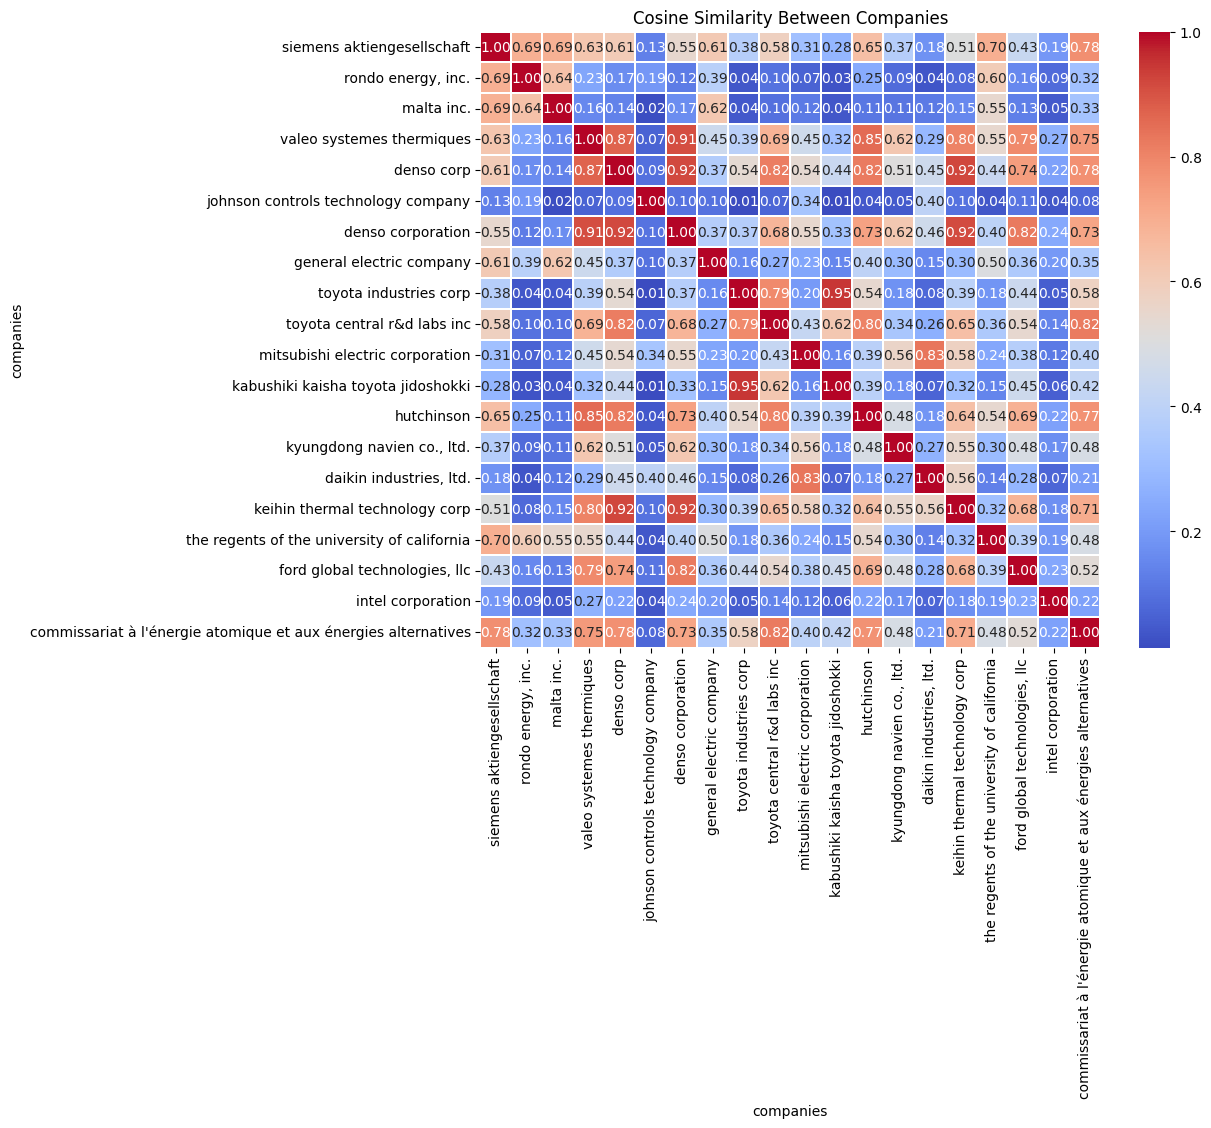

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df.loc[top20_company,top20_company], annot=True, cmap='coolwarm', fmt=".2f", linewidths=.1)
plt.title('Cosine Similarity Between Companies')
plt.show()


In [30]:
vector_table

ipc_code_front,A01G,A01K,A01M,A01N,A23B,A23C,A23G,A23L,A41D,A42B,...,H02P,H02S,H04B,H04L,H04N,H04R,H04W,H05B,H05K,H10N
companies,,,,,,,,,,,,,,,,,,,,,
oy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1414 degrees limited,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2 canal view, wharf farm",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
247solar inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2555663 ontario limited,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"zwinkels, andrew",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zymergen inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
züblin ag,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
